# Color Quantization using K-Means

Performs a pixel-wise Vector Quantization (VQ) of an image of the summer palace (China), reducing the number of colors required to show the image from 96,615 unique colors to 64, while preserving the overall appearance quality.

In this example, pixels are represented in a 3D-space and K-means is used to find 64 color clusters. In the image processing literature, the codebook obtained from K-means (the cluster centers) is called the color palette. Using a single byte, up to 256 colors can be addressed, whereas an RGB encoding requires 3 bytes per pixel. The GIF file format, for example, uses such a palette.

For comparison, a quantized image using a random codebook (colors picked up randomly) is also shown.

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time



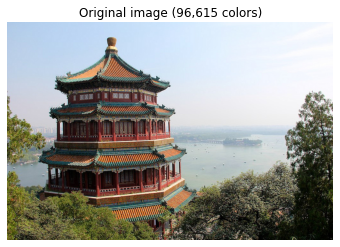

Image Shape (3D Array):  (427, 640, 3)


dtype('uint8')

In [81]:


# Load the Summer Palace photo
china = load_sample_image("china.jpg")


plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(china)
plt.show()

print("Image Shape (3D Array): ", china.shape)
china.dtype



Data Type:  float64
Dimension of Reshaped Array:  (273280, 3)
Fitting model on a small sub-sample of the data


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


done in 0.255s.
Predicting color indices on the full image (k-means)
done in 0.014s.
(273280, 3)
(427, 640, 3)


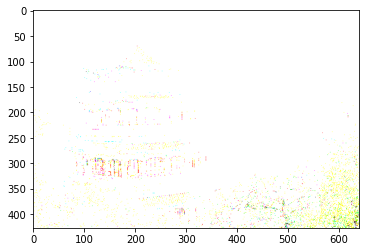

In [82]:
# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
china = np.array(china, dtype=np.float64) / 255

print("Data Type: ", china.dtype)

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(china.shape)
assert d == 3
image_array = np.reshape(china, (w * h, d))

#image_array = china.reshape(-1, 3)

print("Dimension of Reshaped Array: ", image_array.shape)


n_colors = 64
print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
print("done in %0.3fs." % (time() - t0))

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print("done in %0.3fs." % (time() - t0))


img = kmeans.cluster_centers_[labels]

print(img.shape)

kmeans_img = image_array.reshape(china.shape)

print(kmeans_img.shape)


kmeans_im = np.array(kmeans_img, dtype=np.int) *255
plt.imshow(kmeans_img*255)
#plt.imshow(kmeans_img/255)
#plt.imshow((kmeans_img * 255).astype(np.uint8))
plt.show()

Predicting color indices on the full image (random)
done in 0.185s.


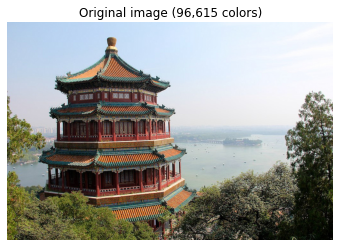

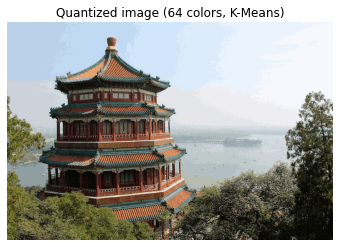

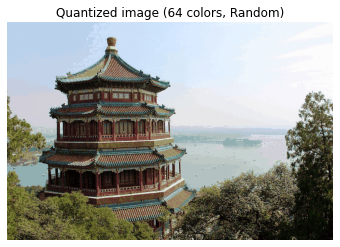

In [83]:
codebook_random = shuffle(image_array, random_state=0)[:n_colors]
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random,
                                          image_array,
                                          axis=0)
print("done in %0.3fs." % (time() - t0))


def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(china)



plt.figure(2)
plt.clf()
plt.axis('off')
plt.title('Quantized image (64 colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis('off')
plt.title('Quantized image (64 colors, Random)')
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()